<a href="https://colab.research.google.com/github/valeraboyko2002/test/blob/main/data_structure_and_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### "Big O" Notation

In [ ]:
import numpy as np
import tensorflow as tf
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

#### Постоянное время

In [ ]:
def take_first(my_list):
    return my_list[0]

short_list = [13, 25, 42]

tic = time.process_time()
first = take_first(short_list)
toc = time.process_time()

print(tic)
print(first)
print(toc-tic)

14.893894516
13
8.170699999965336e-05


In [ ]:
import time

def process_large_list():
    return [x**2 for x in range(1000000)]

tic = time.process_time()
result = process_large_list()
toc = time.process_time()

print(f"Время выполнения: {toc-tic:.6f} секунд")

Время выполнения: 0.165196 секунд


In [ ]:
long_list = [42] * 10**8 # one hundred million items
len(long_list)

100000000

In [ ]:
tic = time.process_time()
first = take_first(long_list)
toc = time.process_time()

toc-tic

0.00011801099999964038

In [ ]:
list_lengths = [10**l for l in range(1, 8)]
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [ ]:
constant_times = []

for l in list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = take_first(lst)
    toc = time.process_time()

    constant_times.append(toc-tic)

In [ ]:
import time
import pandas as pd

def take_first(my_list):
    return my_list[0]

def accurate_measurement(list_lengths, iterations=1000):
    constant_times = []

    for l in list_lengths:
        lst = [42] * l

        total_time = 0
        for _ in range(iterations):
            tic = time.perf_counter()
            x = take_first(lst)
            toc = time.perf_counter()
            total_time += (toc - tic)

        avg_time = total_time / iterations
        constant_times.append(avg_time)

        print(f"n={l:>8}: {avg_time:.2e} сек")

    return pd.DataFrame({'n': list_lengths, 'время': constant_times})

list_lengths = [10, 100, 1000, 10000, 100000, 1000000]
constant_df = accurate_measurement(list_lengths, iterations=10000)
print("\nУсовершенствованные результаты:")
print(constant_df)

n=      10: 1.54e-07 сек
n=     100: 1.45e-07 сек
n=    1000: 1.46e-07 сек
n=   10000: 1.48e-07 сек
n=  100000: 1.80e-07 сек
n= 1000000: 1.52e-07 сек

Усовершенствованные результаты:
         n         время
0       10  1.544035e-07
1      100  1.453205e-07
2     1000  1.462408e-07
3    10000  1.480442e-07
4   100000  1.799999e-07
5  1000000  1.521101e-07


#### Линейное время

In [ ]:
def find_max(my_list):
    max_value = my_list[0]
    for i in range(len(my_list)):
        if my_list[i] > max_value:
            max_value = my_list[i]
    return max_value

tic = time.process_time()
largest = find_max(short_list)
toc = time.process_time()

toc-tic

7.792899999969904e-05

In [ ]:
largest

42

In [ ]:
tic = time.process_time()
largest = find_max(long_list)
toc = time.process_time()

In [ ]:
toc-tic

5.244822483

In [ ]:
linear_times = []

for l in list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = find_max(lst)
    toc = time.process_time()

    linear_times.append(toc-tic)

linear_df = pd.DataFrame(list(zip(list_lengths, linear_times)), columns=['n', 'время'])
linear_df

,n,время
0,10,0.000007
1,100,0.000007
2,1000,0.000099
3,10000,0.000636
4,100000,0.007405
5,1000000,0.048463


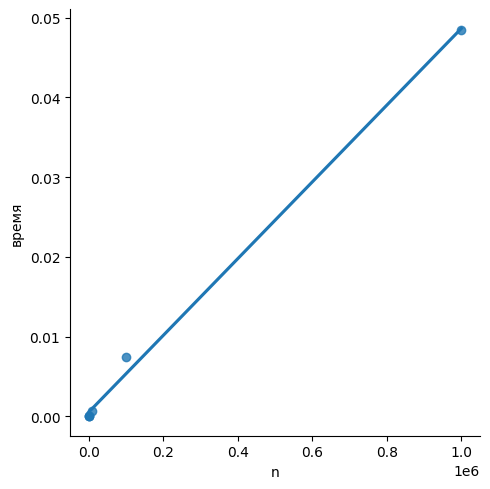

In [ ]:
_ = sns.lmplot(x='n', y='время', data=linear_df, ci=None) # линейная модель (регрессия) граф к

Полиномиальное время

In [ ]:
def element_multiplier(my_list):
    for i in range(len(my_list)):
        for j in range(len(my_list)):
            x = my_list[i] * my_list[j]

print(list_lengths)
print(list_lengths[:4])

[10, 100, 1000, 10000, 100000, 1000000]
[10, 100, 1000, 10000]


In [ ]:
granular_list_lengths = list_lengths[:4] + [50, 500, 5000]
granular_list_lengths.sort()
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [ ]:
poly_times = []

for l in granular_list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = element_multiplier(lst)
    toc = time.process_time()

    poly_times.append(toc-tic)

poly_df = pd.DataFrame(list(zip(granular_list_lengths, poly_times)), columns=['n', 'время'])
poly_df

,n,время
0,10,0.000020
1,50,0.000137
2,100,0.000476
3,500,0.016632
4,1000,0.073931
5,5000,1.603779
6,10000,7.512724


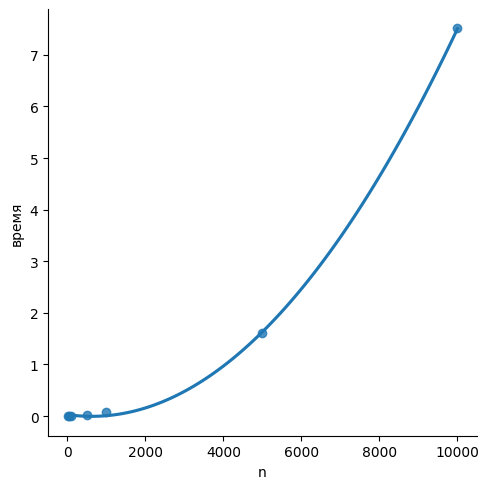

In [ ]:
_ = sns.lmplot(x='n', y='время', data=poly_df, ci=None, order=2)

**In Big O итоги**:

* Константа: O(1)
* Линейное: O($n$)
* Полиноминальное: O($n^2$)

**Другие виды**

* Логарифмическое: O(log $n$)
* Экспонинциальное: O($2^n$)
* O($n$ log $n$)
* O($n!$)

In [ ]:
# binary search
def binary(arr,item):
  min = 0
  max = len(arr)-1
  while min <= max:
    mid = (min + max) //2
    guess = arr[mid]
    if guess == item:
      return mid
    elif guess > item:
      max = mid - 1
    else:
      min = mid + 1
  return mid

In [ ]:
l = [1,4,6,8,10,12,14]
print(binary(l,12))

5


In [ ]:
# QUICKSORT KINDA
def smallest_number(arr):
  min_value = arr[0]
  min_index = 0
  for i in range(1,len(arr)):
    if arr[i] < min_value:
      min_value = arr[i]
      min_index = i
  return min_index

def sorting(arr):
  newArr = []
  copyArr = list(arr)
  for i in range(len(copyArr)):
    smallest = smallest_number(copyArr)
    newArr.append(copyArr.pop(smallest))
  return newArr

  def sorting_optimized(arr):
    for i in range(len(arr)):
      min_index = i
      for j in range(i+1, len(arr)):
        if arr[j]<arr[min_index]:
          min_index = j
      arr[i],arr[min_index]=arr[min_index],arr[i]
  return arr

In [ ]:
sorting([1,14,3,2,-10,81,18,55,439])

[-10, 1, 2, 3, 14, 18, 55, 81, 439]

In [ ]:
def quicksorting(arr):
    if len(arr) <= 1:
        return arr

    random_index = len(arr) // 2
    pivot = arr[random_index]

    low = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    high = [x for x in arr if x > pivot]

    return quicksorting(low) + middle + quicksorting(high)

In [ ]:
quicksorting([1,14,3,2,-10,81,18,55,439])

[-10, 1, 2, 3, 14, 18, 55, 81, 439]